In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from functools import partial

%matplotlib widget

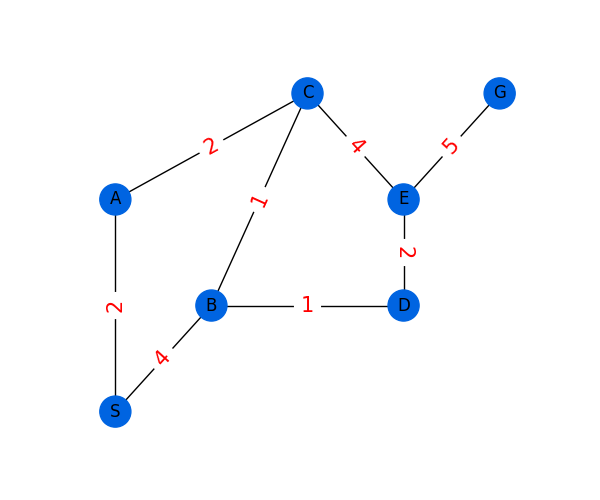

In [2]:
DEFAULT_COLOR = "#0064e1"

def graph_factory():

    node_positions = {
        "S": (0, 0),
        "A": (0, 2),
        "B": (1, 1),
        "C": (2, 3),
        "D": (3, 1),
        "E": (3, 2),
        "G": (4, 3),
    }

    node_colors = {node: DEFAULT_COLOR for node in node_positions.keys()}

    node_attrs = {"positions": node_positions, "colors": node_colors}

    G = nx.Graph()

    G.add_weighted_edges_from(
        [
            ("S", "A", 2),
            ("S", "B", 4),
            ("A", "C", 2),
            ("B", "C", 1),
            ("C", "E", 4),
            ("B", "D", 1),
            ("D", "E", 2),
            ("E", "G", 5)
        ]
        )

    return G, node_attrs


G, node_attrs = graph_factory()


def draw_graph(ax, G, node_attrs, edge_labels=False):
    nx.draw(G,
            ax=ax,
            pos=node_attrs["positions"],
            with_labels=True,
            node_size=500,
            nodelist=list(node_attrs["colors"].keys()),
            node_color=list(node_attrs["colors"].values()),
            )
    
    if edge_labels:
        nx.draw_networkx_edge_labels(
            G,
            ax=ax,
            pos=node_attrs["positions"],
            edge_labels={edge: G.edges[edge]["weight"] for edge in G.edges},
            font_size=15,
            font_color="red",
            )


fig, ax = plt.subplots(figsize=(6, 5))
draw_graph(ax, G, node_attrs, edge_labels=True)
plt.show()

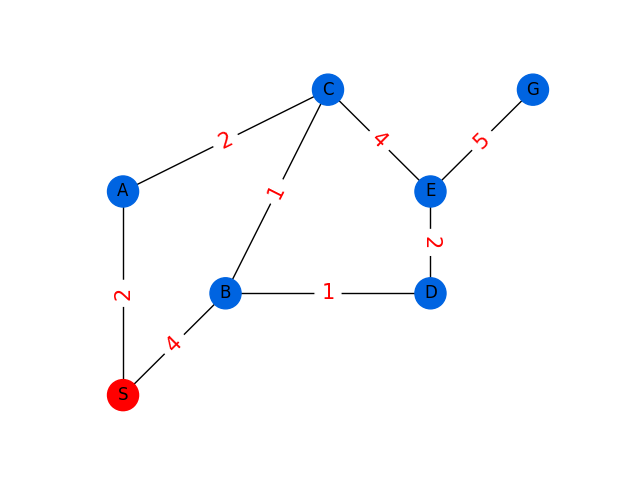

In [ ]:
node_attrs["colors"]["S"] = "red"
fig, ax = plt.subplots()
draw_graph(ax, G, node_attrs, edge_labels=True)
plt.show()

## Animate the graph

In [44]:
G, node_attrs = graph_factory()
visited = set()
def update(ax, frame):
    visited.add(frame)
    ax.clear()
    ax.axis("off")


    # Background 
    background_nodes = nx.draw_networkx_nodes(
        G,
        nodelist=G.nodes(),
        pos=node_attrs["positions"],
        node_color=DEFAULT_COLOR,
        ax=ax
        )
    
    graph_edges = nx.draw_networkx_edges(G, pos=node_attrs["positions"], ax=ax)

    visited_node = nx.draw_networkx_nodes(
        G,
        nodelist=visited,
        pos=node_attrs["positions"],
        node_color="red",
        ax=ax
        )
    
    nodes_labels = nx.draw_networkx_labels(
        G,
        pos=node_attrs["positions"],
        labels={k: k for k in G.nodes},
        ax=ax
        )

    ax.set_xticks([])
    ax.set_yticks([])

# fig, ax = plt.subplots()
# ax.axis("off")
# ani = animation.FuncAnimation(fig, partial(update, ax), interval=1000, frames=list(G.nodes), repeat=False)
# plt.show()


['S']
['S', 'B']
['S', 'B', 'D']
['S', 'B', 'D', 'E']
['S', 'B', 'D', 'E', 'G']
['S', 'B', 'D', 'E', 'C']
['S', 'B', 'C']
['S', 'A']


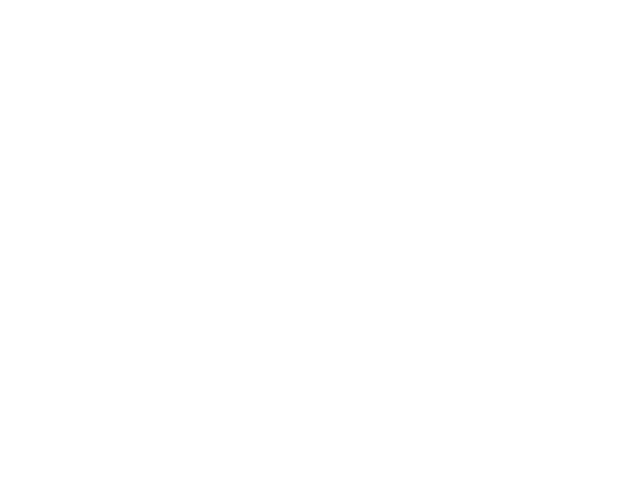

In [50]:
from collections import deque

def dfs(G, start, end):
    assert start in G, f"{start} node not in Graph"
    assert end in G, f"{end} node not in Graph"
    
    q = deque([[start]])
    visited = set()

    while q:
        
        path = q.popleft()
        last_node = path[-1]

        yield path
        
        if last_node == end:
            return path

        if last_node in visited:
            continue

        visited.add(last_node)

        for neighbor in sorted(list(G.adj[last_node])):
            if neighbor not in visited:
                q.appendleft(path + [neighbor])

    return []

G, node_attrs = graph_factory()
G.remove_edge("C", "A")
# path = dfs(G, "S", "G")

fig, ax = plt.subplots()
ax.axis("off")

for path in dfs(G, "S", "A"):
    print(path)
    visited = set()
    ani = animation.FuncAnimation(fig, partial(update, ax), interval=500, frames=path, repeat=False)
plt.show()


In [40]:
G.edges

EdgeView([('S', 'A'), ('S', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('E', 'D'), ('E', 'G')])